# A machine learning Model for predicting diabetes based on KNN algorithm

## 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

## 2. Importing the dataset

In [2]:
df = pd.read_csv('diabetes_dataset__2019.csv')

In [3]:
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


## 3. Data Cleaning and Pre-processing

### 3.1. Trimming whitespaces from columns with object datatype

In [4]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
df_obj.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,Smoking,Alcohol,RegularMedicine,JunkFood,Stress,BPLevel,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,no,no,no,occasionally,sometimes,high,0,not much,no
1,50-59,Male,no,yes,less than half an hr,no,no,yes,very often,sometimes,normal,0,not much,no
2,40-49,Male,no,no,one hr or more,no,no,no,occasionally,sometimes,normal,0,not much,no
3,50-59,Male,no,no,one hr or more,no,no,no,occasionally,sometimes,normal,0,not much,no
4,40-49,Male,no,no,less than half an hr,no,no,no,occasionally,sometimes,normal,0,not much,no


### 3.2. Listing the different kinds of values present in the columns of dataset

In [5]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print(f'='*25)

Age
less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64
Gender
Male      580
Female    372
Name: Gender, dtype: int64
Family_Diabetes
no     498
yes    454
Name: Family_Diabetes, dtype: int64
highBP
no     724
yes    228
Name: highBP, dtype: int64
PhysicallyActive
less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64
BMI
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
Smoking
no     844
yes    108
Name: Smoking, dtype: int64
Alcohol
no     760
yes    192
Name: Alcohol, dtype: int64
Sleep
7     264
8     256
6     256
5      68
9      48
4      32
10     24
11

### 3.3. Correcting the typo errors 

In [6]:
df['RegularMedicine'].replace('o','no', inplace=True)
df['BPLevel'] = df['BPLevel'].str.lower()
df['Pdiabetes'].replace('0', 'no', inplace=True)

### 3.4. Checking the missing and NaN values

In [7]:
df[df['Gender']=='Male']['Pregancies'].isna().sum()

16

### 3.5. Replacing replacable values with 0 and dropping the unreplacable NaN values

In [8]:
df['Pregancies'].replace(np.nan, 0, inplace=True)
# will drop all NaN's 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               947 non-null    object 
 1   Gender            947 non-null    object 
 2   Family_Diabetes   947 non-null    object 
 3   highBP            947 non-null    object 
 4   PhysicallyActive  947 non-null    object 
 5   BMI               947 non-null    float64
 6   Smoking           947 non-null    object 
 7   Alcohol           947 non-null    object 
 8   Sleep             947 non-null    int64  
 9   SoundSleep        947 non-null    int64  
 10  RegularMedicine   947 non-null    object 
 11  JunkFood          947 non-null    object 
 12  Stress            947 non-null    object 
 13  BPLevel           947 non-null    object 
 14  Pregancies        947 non-null    float64
 15  Pdiabetes         947 non-null    object 
 16  UriationFreq      947 non-null    object 
 1

### 3.6. Adding dummy variables for columns with multinary values

In [9]:
multinary_columns = ['Age', 'BPLevel', 'PhysicallyActive', 'JunkFood', 'Stress']
multinary = pd.get_dummies(df[multinary_columns], drop_first=True)
pregnancy = pd.get_dummies(df['Pregancies'],prefix='Pregnancies',drop_first= True)

In [10]:
multinary_columns.append('Pregancies')
untouched_columns = [col for col in df.columns if col not in multinary_columns]

### 3.7. Concatinating all the columns into one dataframe

In [11]:
new_df = pd.concat([multinary, pregnancy, df[untouched_columns]], axis=1)

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 951
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age_50-59                              947 non-null    uint8  
 1   Age_60 or older                        947 non-null    uint8  
 2   Age_less than 40                       947 non-null    uint8  
 3   BPLevel_low                            947 non-null    uint8  
 4   BPLevel_normal                         947 non-null    uint8  
 5   PhysicallyActive_more than half an hr  947 non-null    uint8  
 6   PhysicallyActive_none                  947 non-null    uint8  
 7   PhysicallyActive_one hr or more        947 non-null    uint8  
 8   JunkFood_occasionally                  947 non-null    uint8  
 9   JunkFood_often                         947 non-null    uint8  
 10  JunkFood_very often                    947 non-null    uint8  
 11  Stress

### 3.8. Converting columns with binary values to numbers

In [13]:
binary_columns = ['Diabetic', 'Pdiabetes', 'RegularMedicine', 'Alcohol', 'Smoking', 'highBP', 'Family_Diabetes']
two_values_cols = ['UriationFreq', 'Gender']
for col in binary_columns:
    new_df[col] = new_df[col].apply(lambda x: 0 if x=='no' else 1)
    
new_df['UriationFreq'] = new_df['UriationFreq'].apply(lambda x: 0 if x=='not much' else 1)
new_df['Gender'] = new_df['Gender'].apply(lambda x: 0 if x=='Female' else 1)

In [14]:
new_df.head()

,Age_50-59,Age_60 or older,Age_less than 40,BPLevel_low,BPLevel_normal,PhysicallyActive_more than half an hr,PhysicallyActive_none,PhysicallyActive_one hr or more,JunkFood_occasionally,JunkFood_often,...,highBP,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,Pdiabetes,UriationFreq,Diabetic
0,1,0,0,0,0,0,0,1,1,0,...,1,39.0,0,0,8,6,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,1,28.0,0,0,8,6,1,0,0,0
2,0,0,0,0,1,0,0,1,1,0,...,0,24.0,0,0,6,6,0,0,0,0
3,1,0,0,0,1,0,0,1,1,0,...,0,23.0,0,0,8,6,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,27.0,0,0,8,8,0,0,0,0


### 3.9. Displaying the number of diabetic and non-diabetic
#### `Diabetic = 1, Non-Diabetic = 0`

In [15]:
new_df['Diabetic'].value_counts()

0    682
1    265
Name: Diabetic, dtype: int64

## 4. Splitting the dataset into training and testing set
#### `Training data = 80%, Testing data = 20%`

In [16]:
X = new_df.drop('Diabetic', axis=1)
y = new_df['Diabetic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [17]:
# number of examples in the train and test set
print(len(X_train), len(X_test)) 

757 190


## 5. Calculating the best nearest neighbor value using GridSearchCV

In [18]:
# initializing the model
model = KNN() 

#declaring range of K values
k_range = list(range(3, 31))

param_grid = dict(n_neighbors=k_range)

# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fit the model for grid search
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


### 5.1. Printing the best outputs

In [19]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)

KNeighborsClassifier(n_neighbors=3)
{'n_neighbors': 3}


## 6. Training the KNN model ( `taking K = 3 from grid search` )

In [20]:
# initialize KNN model with K=1
knn_model = KNN(n_neighbors=3)

# fit the model/train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
predictions = knn_model.predict(X_train)
accuracy = accuracy_score(predictions, y_train)
accuracy

0.9709379128137384

## 7. Predictions and accuracy score calculation

### 7.1. `Predictions` for the test data

In [22]:
prediction = knn_model.predict(X_test)

### Calculating the `accuracy score` on the test data

In [23]:
accuracy = accuracy_score(prediction, y_test)
accuracy
print(f"The accuracy score on the test data is {round(accuracy*100, 2)} %")

The accuracy score on the test data is 93.16 %


## 8. Displaying the classification report

In [24]:
label_names = ['Non-Diabetic', 'Diabetic']
print('Classification Report:\n')
print(classification_report(y_test, prediction, target_names = label_names))

Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.92      0.99      0.95       137
    Diabetic       0.98      0.77      0.86        53

    accuracy                           0.93       190
   macro avg       0.95      0.88      0.91       190
weighted avg       0.93      0.93      0.93       190



##  9. Plotting the confusion matrix

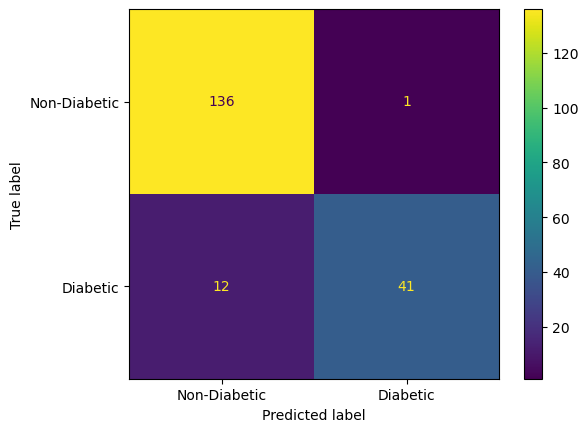

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, prediction, display_labels=label_names)

## 10. Prediction on Diabetic or Non-Diabetic data

### 10.1. Predicting `Diabetic data`

In [26]:
diabetic_data = new_df.loc[new_df['Diabetic'] == 1][0:1].drop('Diabetic', axis=1)

diabetic_prediction = knn_model.predict(diabetic_data)

if(diabetic_prediction[0] == 1):
    print("The person is Diabetic.")
else:
    print("The person is Non Diabetic.")

The person is Diabetic.


### 10.2. Predicting `Non-Diabetic data`

In [27]:
non_diabetic_data = new_df.loc[new_df['Diabetic'] == 0][0:1].drop('Diabetic', axis=1)
non_diabetic_prediction = knn_model.predict(non_diabetic_data)

if(non_diabetic_prediction[0] == 1):
    print("The person is Diabetic.")
else:
    print("The person is Non Diabetic.")

The person is Non Diabetic.
